In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import sklearn.linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [93]:
xTr = pd.read_csv('train_x.csv')
xTr.set_index('date',inplace=True, drop = True)


yRegression = pd.read_csv('train_y_regression.csv')
yClassification = pd.read_csv('train_y_classification.csv')

<AxesSubplot:>

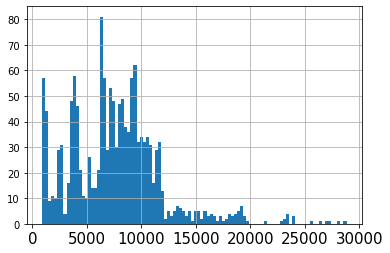

In [123]:
yRegression['next_day_close'].hist(bins=100)

"\ni = 0\nfor triaxis in axes:\n    for axis in triaxis:\n        sns.displot(xTr.columns[i], bins = 100, kde=True,ax=axis)\n        #xTr.hist(column = xTr.columns[i], bins = 100, ax=axis)\n        axis.set_xlabel(xTr.columns[i])\n        axis.set_ylabel('frequency')\n        i = i+1\n"

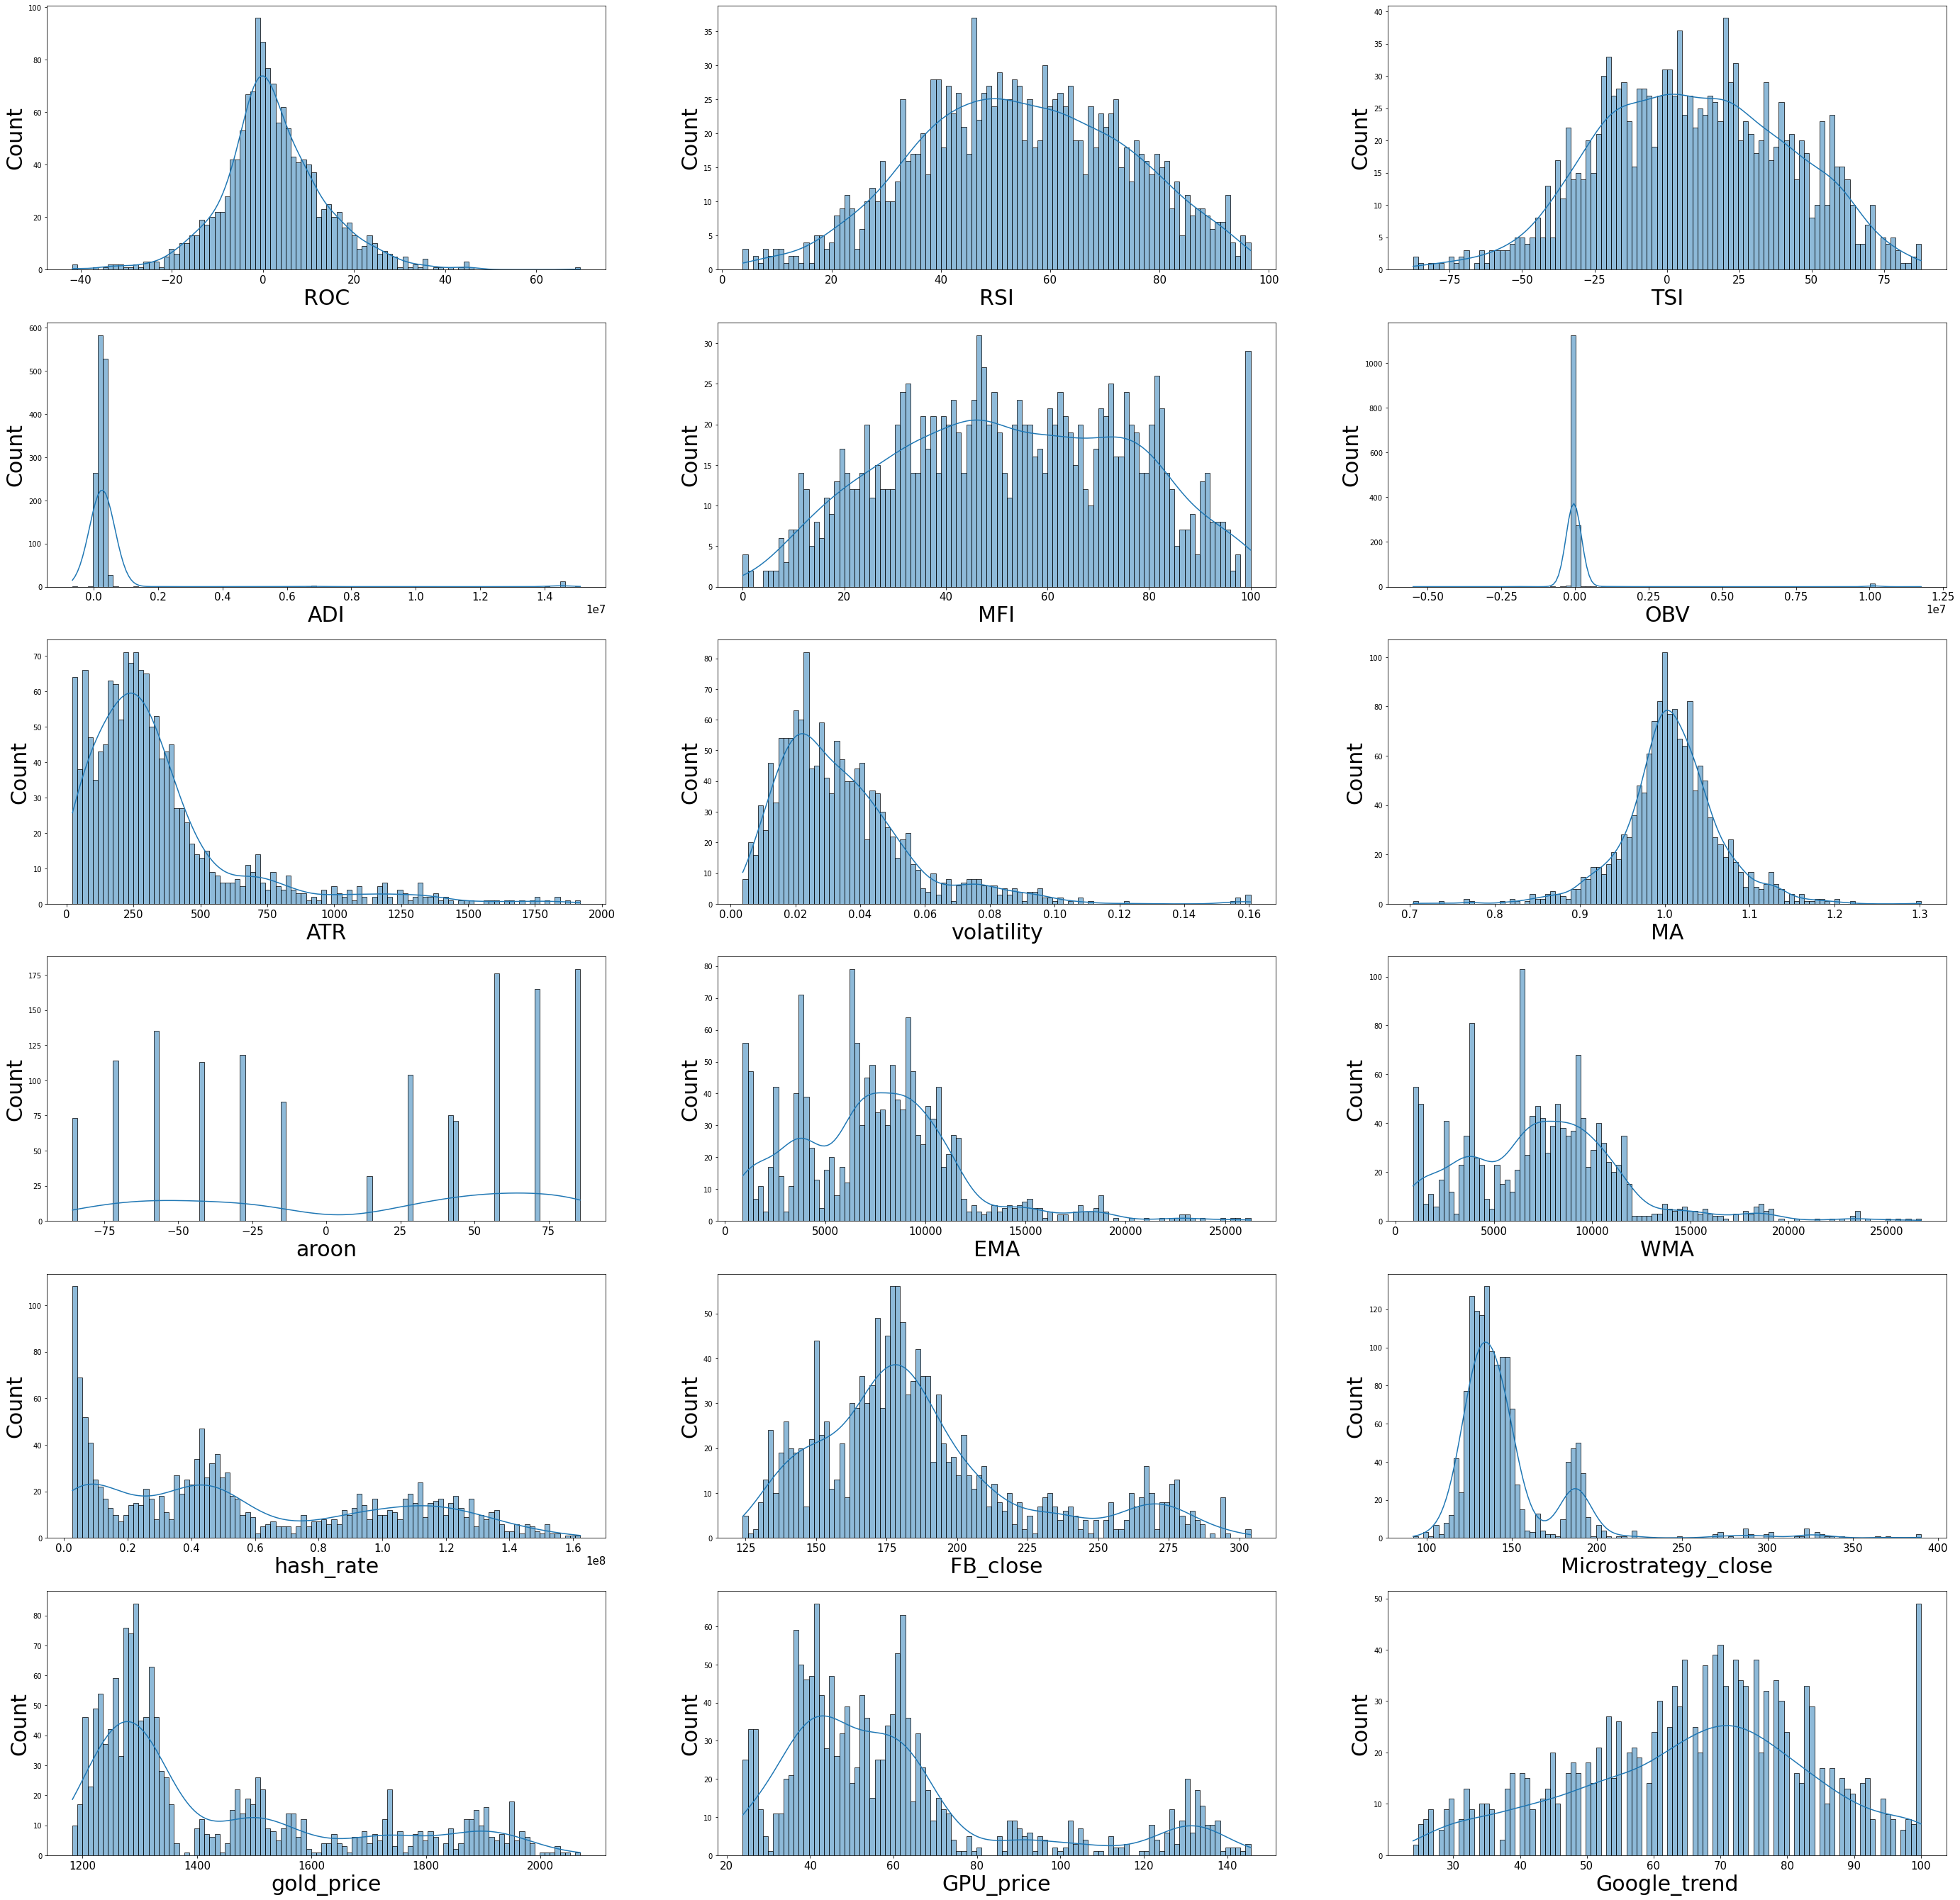

In [132]:
fig, axes = plt.subplots(len(xTr.columns)//3, 3, figsize=(48, 48))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['xtick.labelsize'] = 15
axes = axes.flatten()


for i,col in enumerate(xTr.columns[0:]):
     sns.histplot(x=xTr[col], kde=True, bins=100, ax=axes[i])
'''
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.displot(xTr.columns[i], bins = 100, kde=True,ax=axis)
        #xTr.hist(column = xTr.columns[i], bins = 100, ax=axis)
        axis.set_xlabel(xTr.columns[i])
        axis.set_ylabel('frequency')
        i = i+1
'''

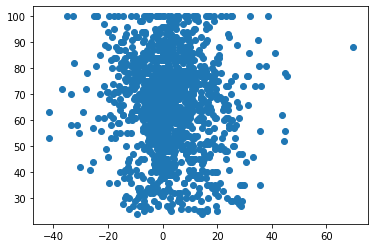

In [95]:
plt.scatter(xTr['ROC'],xTr['Google_trend'])

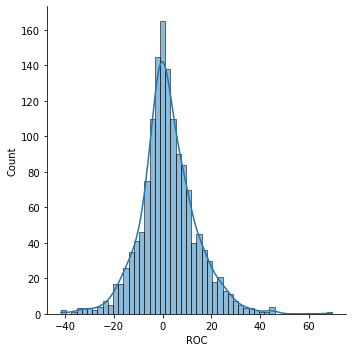

In [96]:

sns.displot(xTr.ROC, kde=True) #plot of ROC

<AxesSubplot:xlabel='Google_trend', ylabel='next_day_close'>

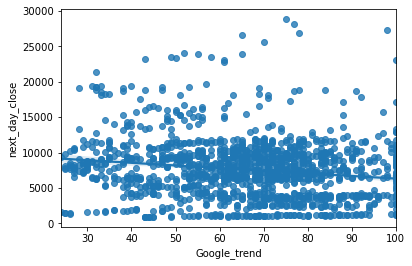

In [97]:
sns.regplot(x=xTr.Google_trend, y=yRegression.next_day_close)

<AxesSubplot:xlabel='volatility', ylabel='next_day_close'>

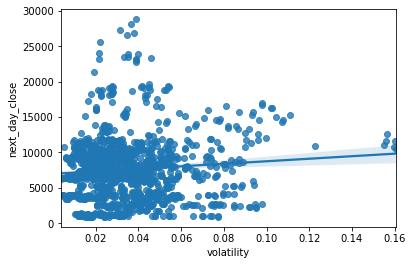

In [98]:
sns.regplot(x=xTr.volatility, y=yRegression.next_day_close)

<AxesSubplot:xlabel='FB_close', ylabel='next_day_close'>

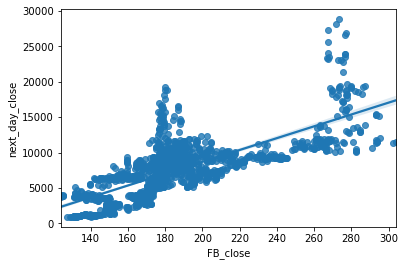

In [99]:
sns.regplot(x=xTr.FB_close, y=yRegression.next_day_close)

<AxesSubplot:xlabel='Microstrategy_close', ylabel='next_day_close'>

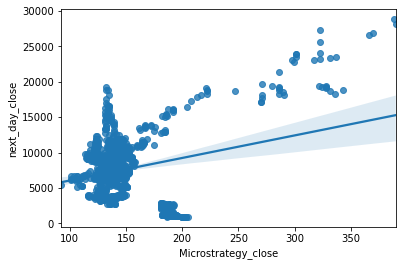

In [100]:
sns.regplot(x=xTr.Microstrategy_close, y=yRegression.next_day_close)

<AxesSubplot:xlabel='Microstrategy_close', ylabel='next_day_close'>

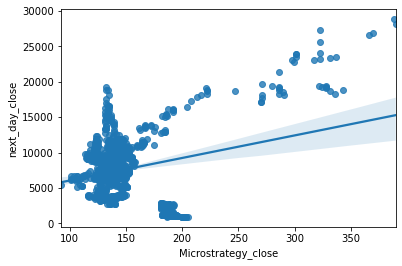

In [101]:
sns.regplot(x=xTr.Microstrategy_close, y=yRegression.next_day_close)

<AxesSubplot:xlabel='hash_rate', ylabel='next_day_close'>

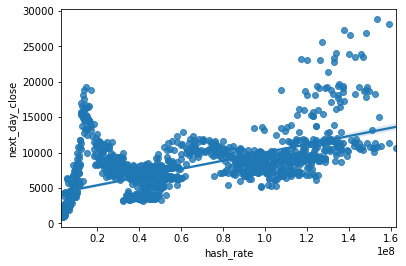

In [102]:
sns.regplot(x=xTr.hash_rate, y=yRegression.next_day_close) #this is interesting. the relationship is nonlinear, but there seems to be some predictable relationship

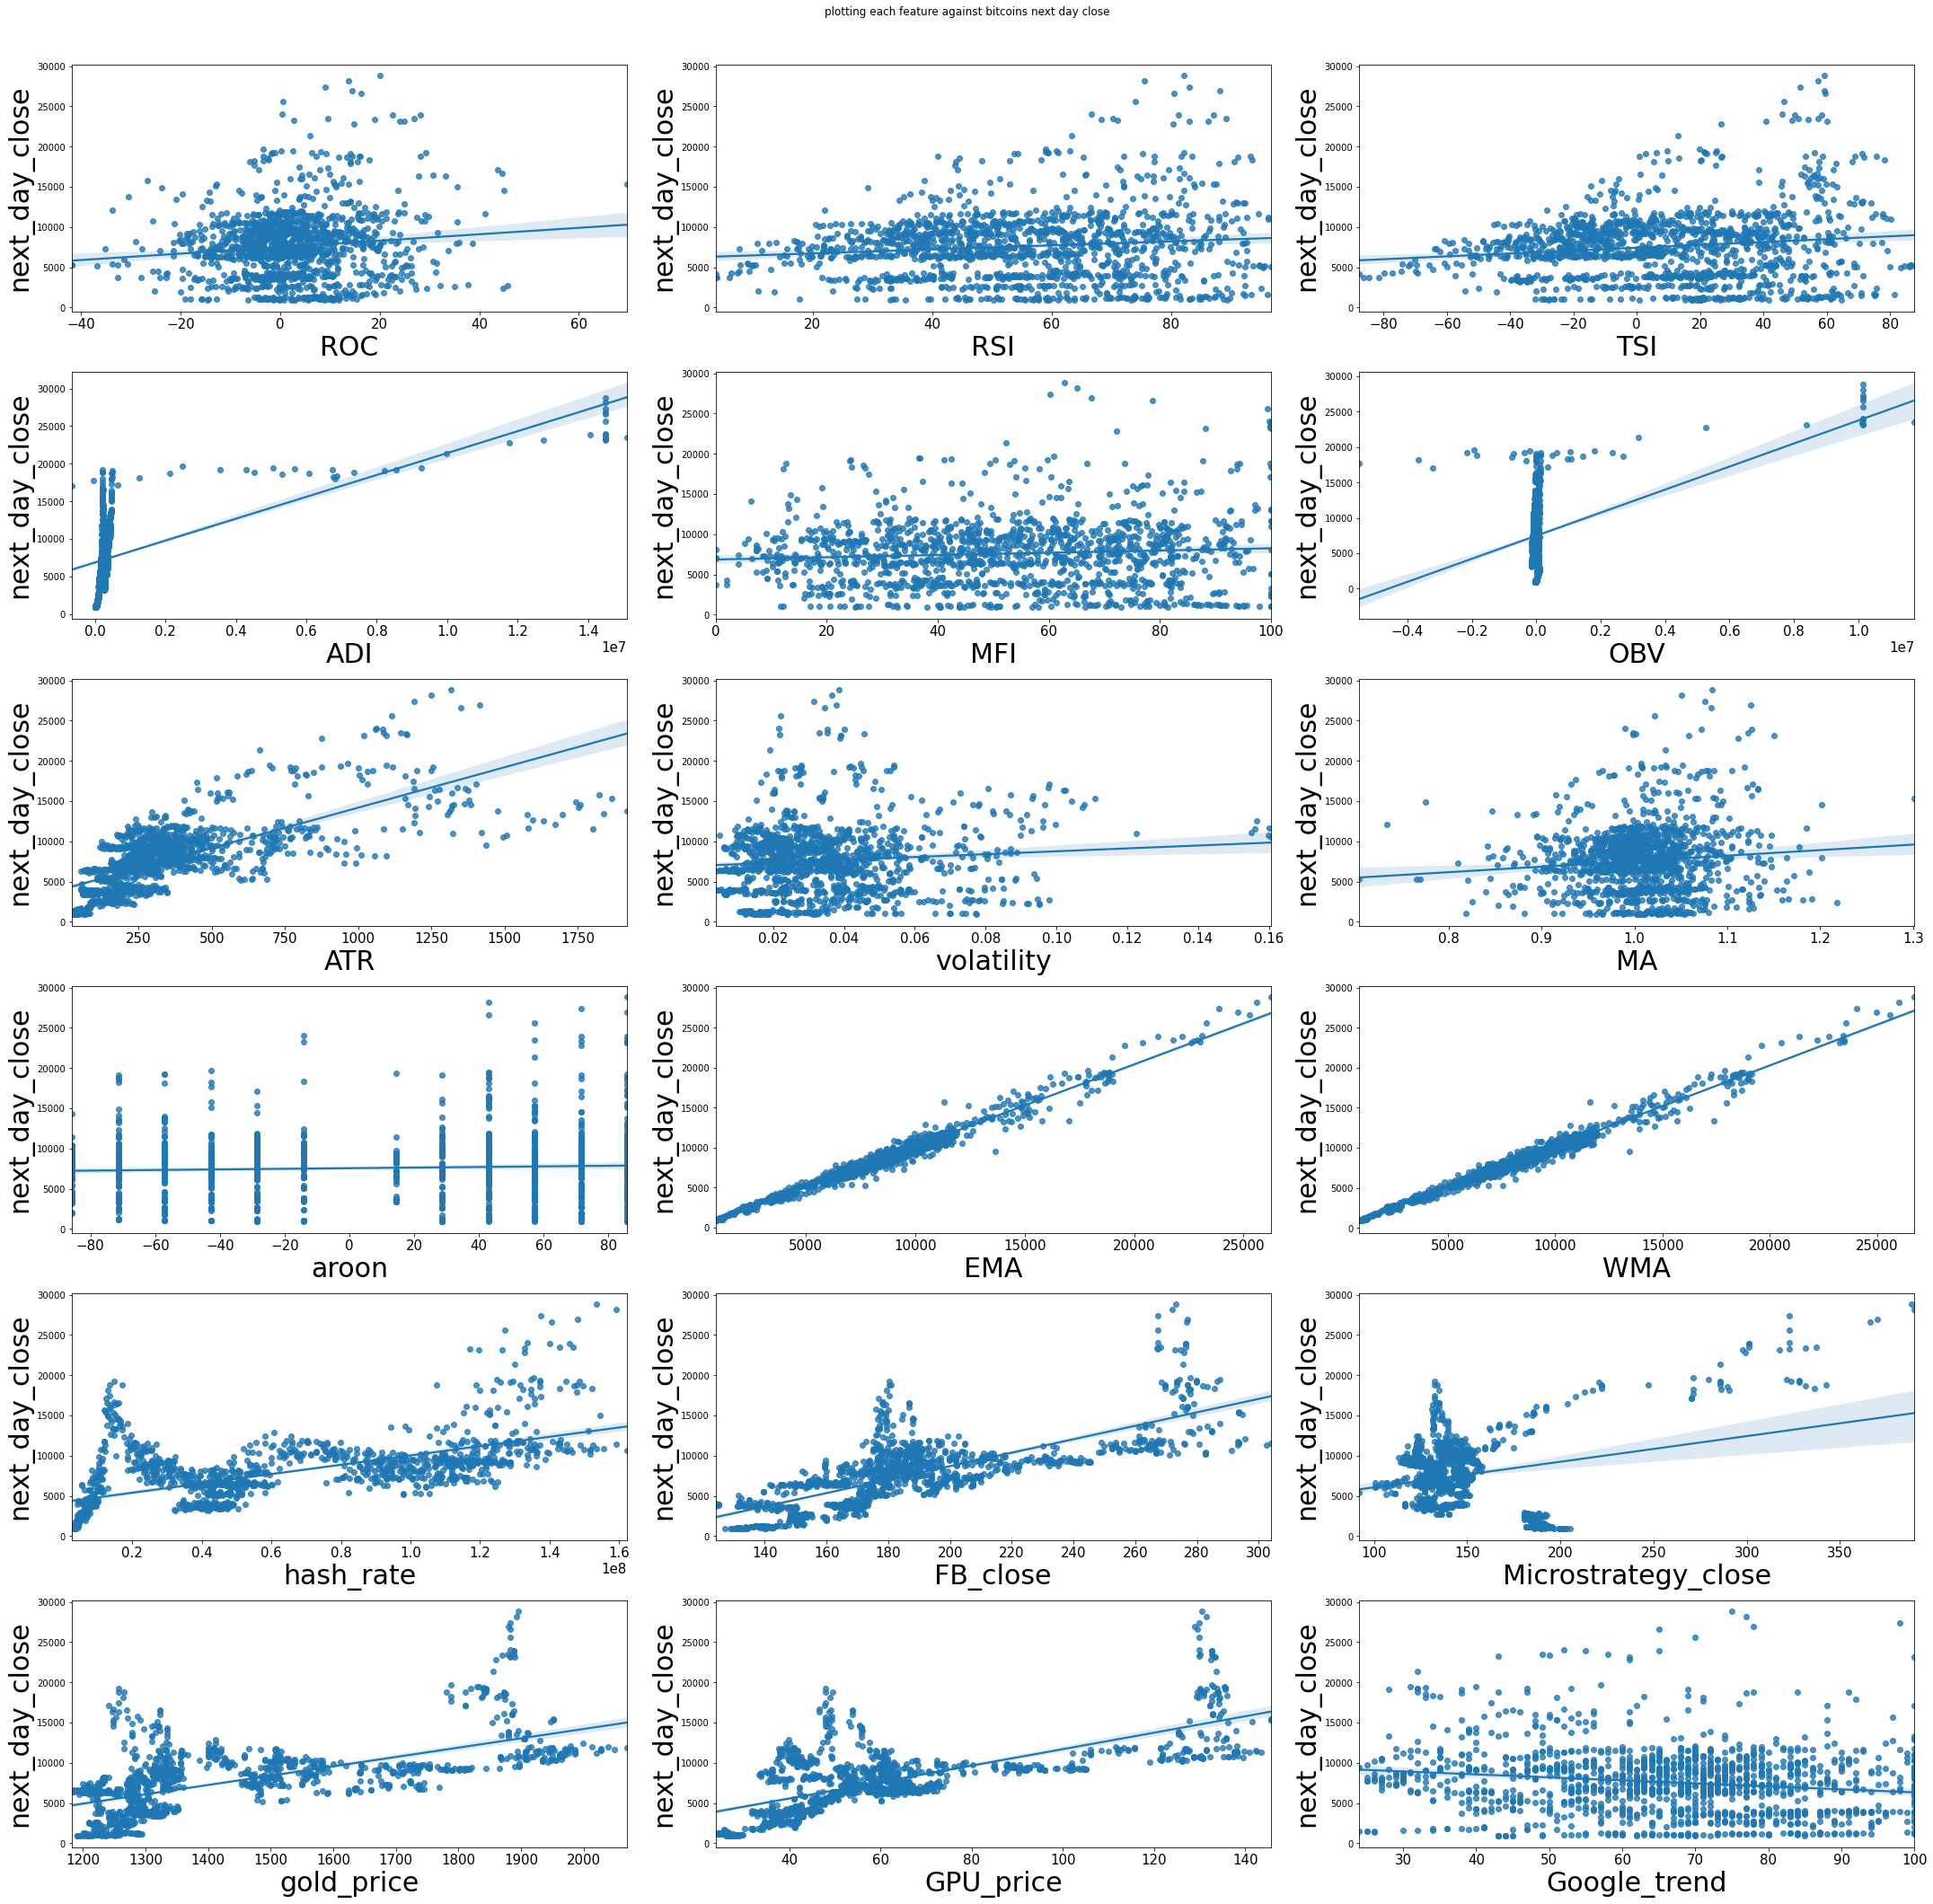

In [120]:

fig, ax= plt.subplots(len(xTr.columns)//3, 3, figsize=(30,30))
ax = ax.flatten()

plt.rcParams["axes.labelsize"] = 30
plt.rcParams['xtick.labelsize'] = 15

for i,col in enumerate(xTr.columns[0:]):
     sns.regplot(x=xTr[col], y=yRegression['next_day_close'], ax=ax[i])

fig.suptitle('plotting each feature against bitcoins next day close')
fig.tight_layout()
fig.subplots_adjust(top=0.95)      # TO ACCOMMODATE TITLE


plt.show()

In [117]:
#scaling the features to run ridge regression (data preprocessing)
scaler = sklearn.preprocessing.StandardScaler()
xTr_scaled = scaler.fit_transform(xTr)

In [105]:
xTr_scaled_df = pd.DataFrame(xTr_scaled,columns = xTr.columns)

In [109]:
#baseline ridge regression with alpha=1
y = yRegression['next_day_close']

ridge = sklearn.linear_model.Ridge(alpha=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(ridge, xTr_scaled_df, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



Mean MAE: 258.480 (26.137)


In [111]:
#lets use gridsearch to tune alpha (used some code from machinelearningmastery.com)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

search = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(xTr_scaled_df, y)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -257.459
Config: {'alpha': 0.03}


In [112]:
#as you can see from the output, optimizing for alpha doesnt improve the error very much. perhaps ridge regression is not the best option, or
#our feature selection is not where it needs to be quite yet.
ridge = sklearn.linear_model.Ridge(alpha=.03)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(ridge, xTr_scaled_df, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 257.459 (25.363)
